<a href="https://colab.research.google.com/github/You10Ariga/python-with-datasciece/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://github.com/nagamamo/data/blob/main/2_1_efrontier_data.csv?raw=true"
data = pd.read_csv(url)
df = data.set_index("Date")

In [ ]:
Rp = df.mean() * 250
VAR_Rp = df.var() * 250
COV_Rp = df['700.HK'].cov(df['175.HK']) * 250

In [ ]:
E_Rp = []
for w in np.arange(0,1.01,0.01):
  E_Rp.append(w * Rp['700.HK'] + (1 - w) * Rp['175.HK'])

In [ ]:
VAR_Rp2 = []
for w in np.arange(0,1.01,0.01):
  VAR_Rp2.append(w * w * VAR_Rp['700.HK'] + (1 - w) * (1 - w) * VAR_Rp['175.HK'] + 2 * w * (1 - w) * COV_Rp)
Sigma_Rp = np.sqrt(VAR_Rp2)

Text(0, 0.5, 'Expected Return')

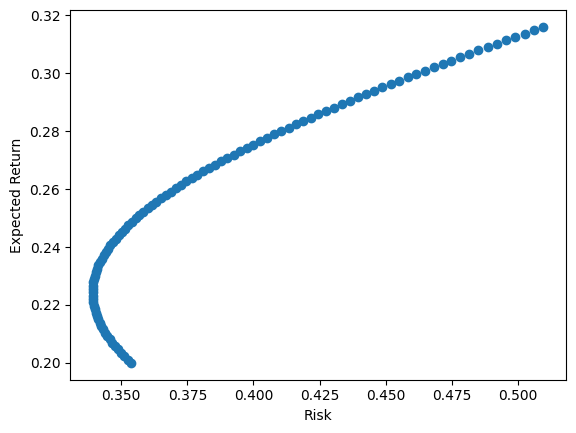

In [ ]:
plt.scatter(Sigma_Rp, E_Rp)
plt.xlabel('Risk')
plt.ylabel('Expected Return')

In [ ]:
rf = 0.03157
weights = np.arange(0,1.01,0.01)
E_Rp = np.array(E_Rp)
Sigma_Rp = np.array(Sigma_Rp)
s_ratio = np.array((E_Rp - rf) / Sigma_Rp)
max_sr = np.amax(s_ratio)

mean_variance = pd.DataFrame({
    "Ratio": weights,
    "Risk": Sigma_Rp,
    "Expected_Returns": E_Rp,
    "Sharp_Ratio": s_ratio
})

In [ ]:
optimal = pd.DataFrame(mean_variance.loc[mean_variance['Sharp_Ratio'].idxmax()])
opt_risk = optimal.iloc[1, 0]
opt_return = optimal.iloc[2,0]
optimal

,49
Ratio,0.490000
Risk,0.368760
Expected_Returns,0.259144
Sharp_Ratio,0.617134


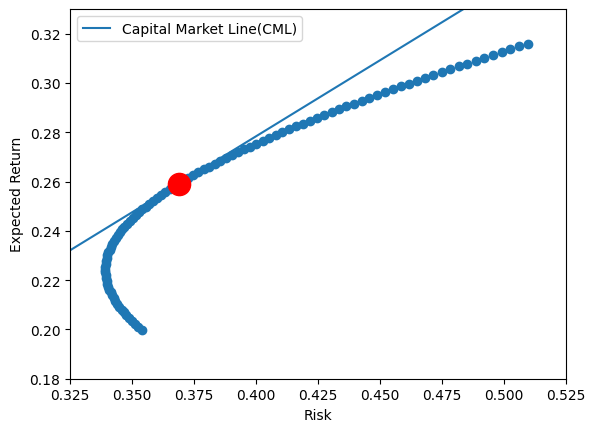

In [ ]:
def CML(rf, opt_risk, opt_return, sharp_ratio, label):
  Risk = [x/100 for x in range(100)]
  Expected_Return = [rf + sharp_ratio * x for x in Risk]
  plt.plot(Risk, Expected_Return, label = label)
  plt.xlabel('Risk')
  plt.ylabel('Expected Return')
  plt.plot(opt_risk, opt_return, 'ro', linestyle = '--', markersize = 16)
CML(rf, opt_risk, opt_return, max_sr, 'Capital Market Line(CML)')
plt.scatter(Sigma_Rp, E_Rp)
plt.xlim(0.325, 0.525)
plt.ylim(0.18, 0.33)
plt.legend()
plt.show()